# <font color='blue'>SENG 474 - Useful Snippets</font>


Student Name:  Mek Obchey \
Student ID:    V00880355 \
Spring 2020


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# import dataset
df = pd.read_csv('./processed.cleveland.data')
df = df.replace('?',np.NaN)
df.apply(pd.to_numeric)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Group labels into two sets {0} = 0 and {1,2,3,4} = 1
y[y > 0] = 1

# replace missing values denoted '?' with the mean of its column 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean', verbose=0)
imputer.fit(X[:])
X[:,:] = imputer.transform(X[:])

# splitting the dataset into the Training set and Test set by 20%.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# create a classifier
from sklearn.tree import DecisionTreeClassifier

# Validation Curve Plot

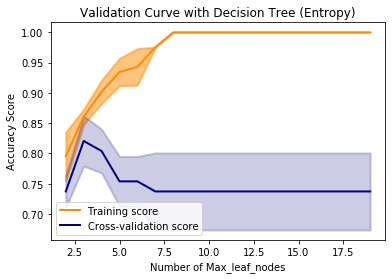

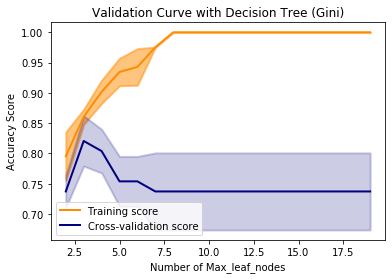

In [4]:
from sklearn.model_selection import validation_curve

#a function that returns train scores and test scores of a classifier
def make_validation_curve(classifier, param, param_range):
    train_scores, test_scores = validation_curve(classifier1, 
                                             X_test, 
                                             y_test, 
                                             param_name=param, 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=1)
    return (train_scores, test_scores)

def graph_validation_curve(train_scores, test_scores, param_range, x_name, y_name, title):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title(title)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    # plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.5,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()


classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2 = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
# classifier1.fit(X_train, y_train)
# classifier2.fit(X_train, y_train)

param = 'max_leaf_nodes'
param_range = np.arange(2, 20, 1)

#score tuple of each classifier: (train_score, test_score)
scores = [
    make_validation_curve(classifier1, param, param_range),
    make_validation_curve(classifier2, param, param_range)         
         ]
x_title = 'Number of ' + param.capitalize()
y_title = 'Accuracy Score'
title = 'Validation Curve with Decision Tree'

graph_validation_curve(scores[0][0], scores[0][1], param_range, x_title, y_title, title + ' (Entropy)')
graph_validation_curve(scores[1][0], scores[1][1], param_range, x_title, y_title, title + ' (Gini)')


# Decision Tree Plot